In [3]:
%matplotlib inline
import pandas as pd
from pandas.plotting import lag_plot
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

def dataget():

    train = 'train.csv'
    test = 'test.csv'
    train_data = pd.read_csv(train)
    test_data = pd.read_csv(test)
    df = train_data.append(test_data, ignore_index=True)
    Title_Dictionary = {
                        "Capt":         "Officer",
                        "Col":          "Officer",
                        "Major":        "Officer",
                        "Jonkheer":     "Royalty",
                        "Don":          "Royalty",
                        "Sir":          "Royalty",
                        "Dr":           "Officer",
                        "Rev":          "Officer",
                        "the Countess": "Royalty",
                        "Dona":         "Royalty",
                        "Mme":          "Mrs",
                        "Mlle":         "Miss",
                        "Ms":           "Mrs",
                        "Mr":           "Mr",
                        "Mrs":          "Mrs",
                        "Miss":         "Miss",
                        "Master":       "Master",
                        "Lady":         "Royalty"
                        }
    df['Title'] = df['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])
    df['Embarked'].fillna('C', inplace=True)
    means = df.groupby('Title')['Age'].mean()
    map_means = means.to_dict()
    idx_nan_age = df[df['Age'].isnull()]['Age'].index
    for idx in idx_nan_age:
        df.loc[idx, 'Age'] = map_means[df.loc[idx]['Title']]

    df['Imputed'] = 0
    df.loc[idx_nan_age.values, 'Imputed'] = 1
    df['Title'] = pd.Categorical(df['Title'])
    df['Sex'] = pd.Categorical(df['Sex'])
    df['Pclass'] = pd.Categorical(df['Pclass'])
    df['SibSp'] = pd.Categorical(df['SibSp'])
    df['Parch'] = pd.Categorical(df['Parch'])
    df['Embarked'] = pd.Categorical(df['Embarked'])
    df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].mean()
    df = df.drop(columns=['Cabin', 'Name', 'Ticket'])
    #df = df.drop(columns=['Title', 'SibSp', 'Imputed', 'Pclass', 'Parch', 'Embarked', 'Fare'])
    df = df.round(2)
    original = df.copy()
    df = pd.get_dummies(df, drop_first=True)
    test_data = df[df.Survived.isnull()]
    test_data = test_data.drop(columns=['Survived'])
    train_data = df.dropna()
    train_data = train_data.drop(columns=['PassengerId'])

    return original, train_data, test_data


original, train_data, test_data = dataget()
df = original.copy()
df.drop(columns=['PassengerId'], inplace=True)
columns = df.columns
print(columns)



Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Title', 'Imputed'],
      dtype='object')


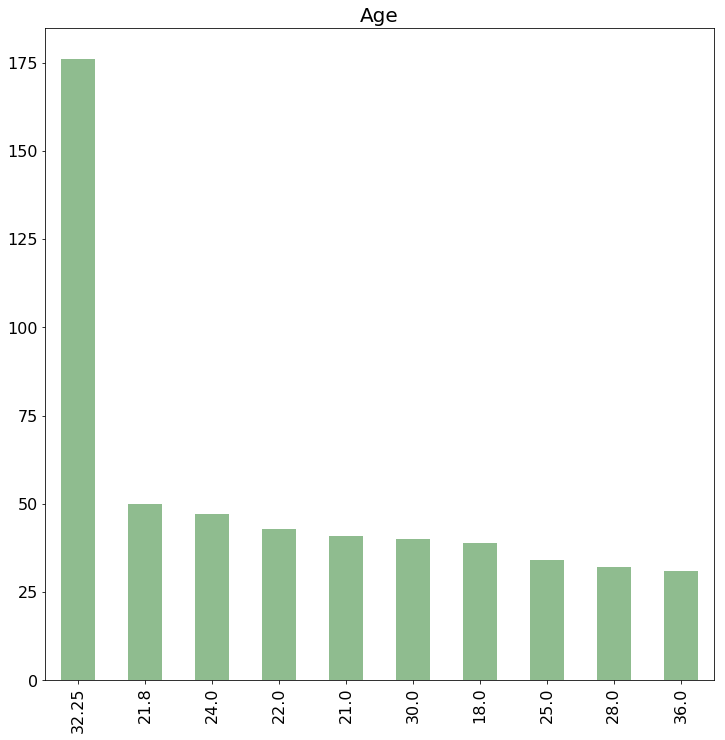

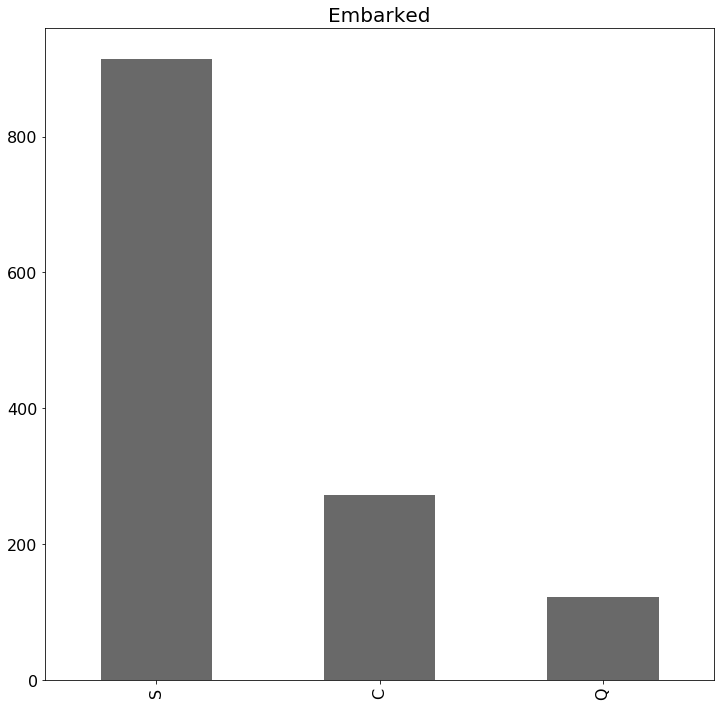

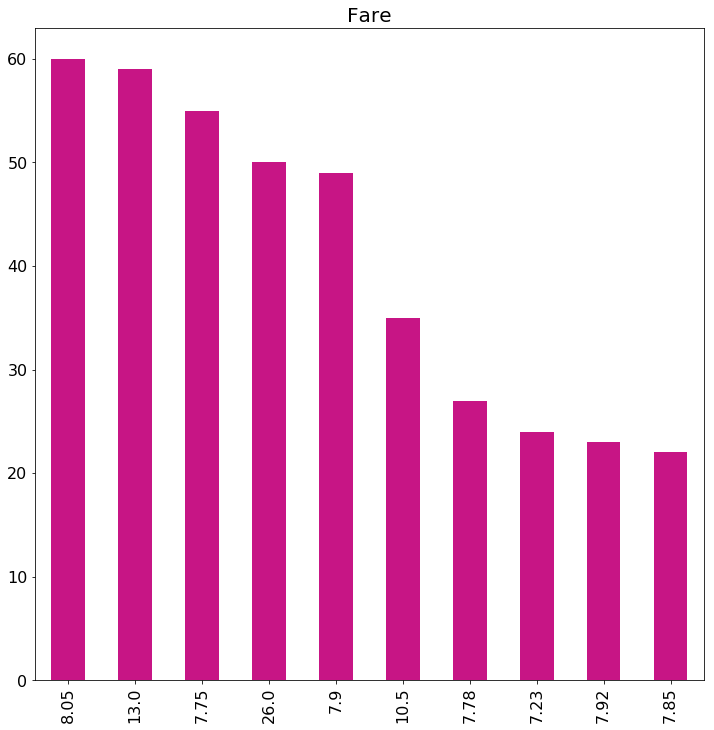

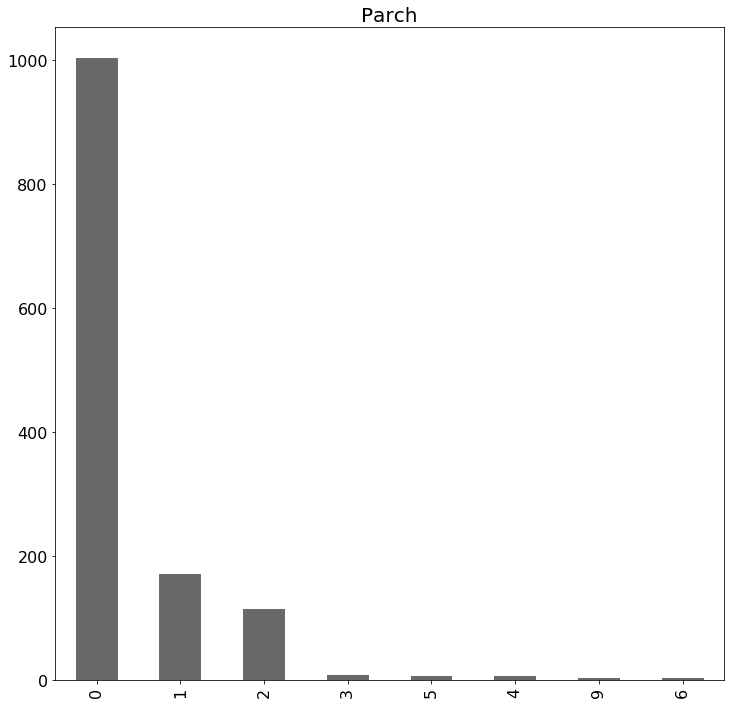

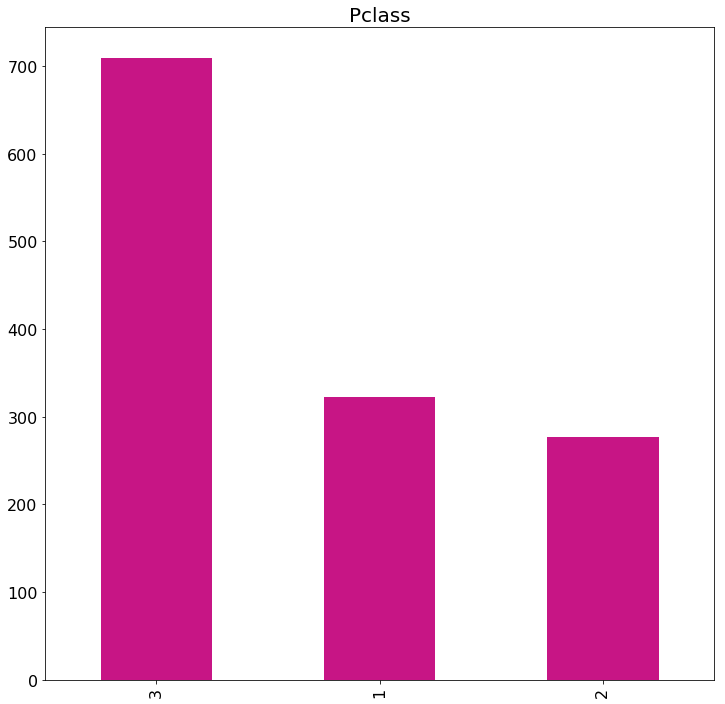

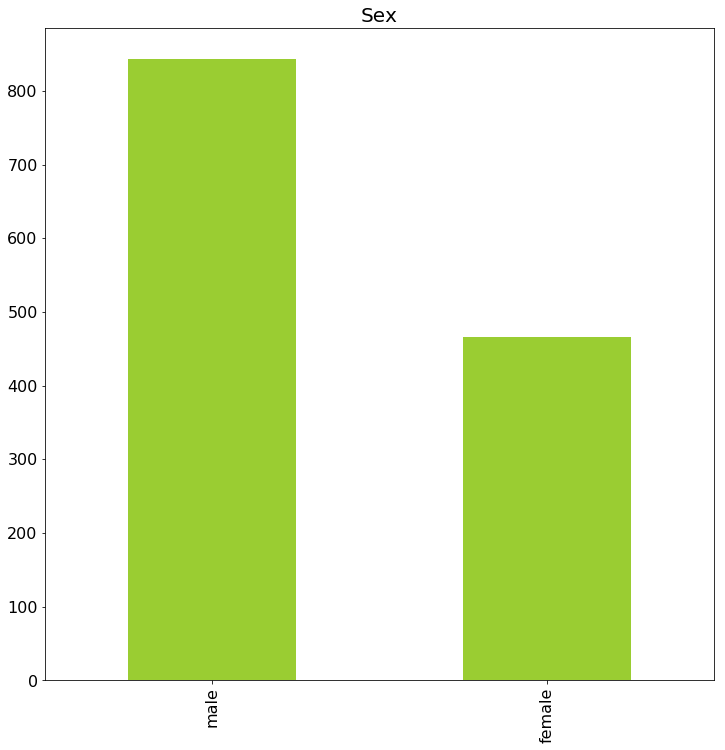

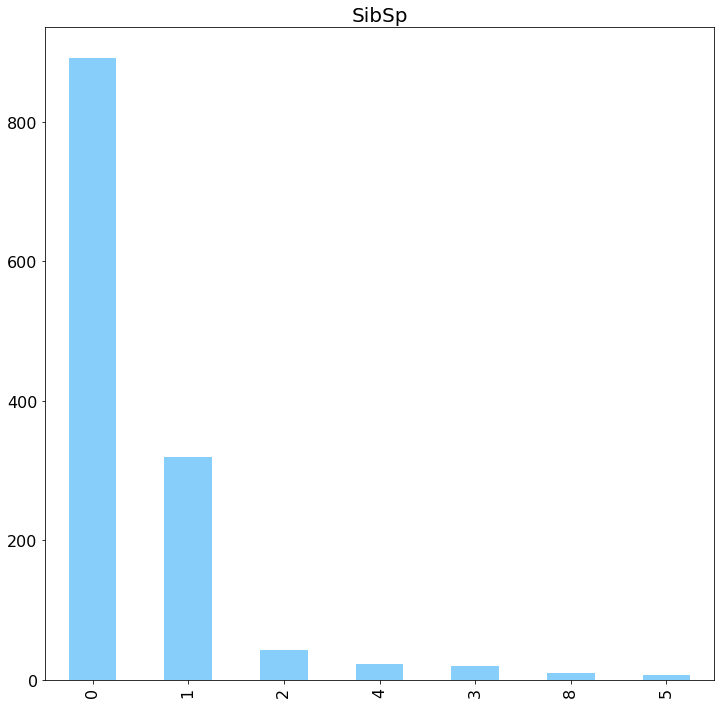

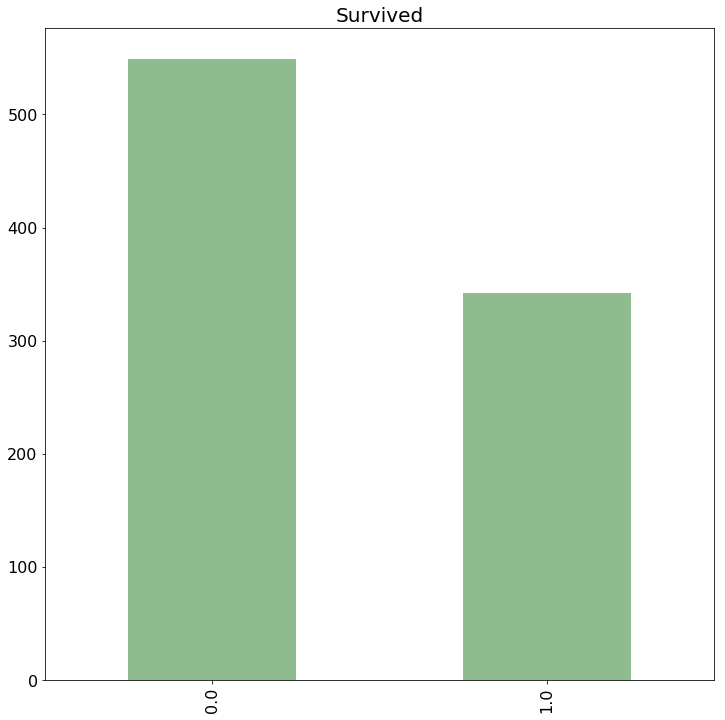

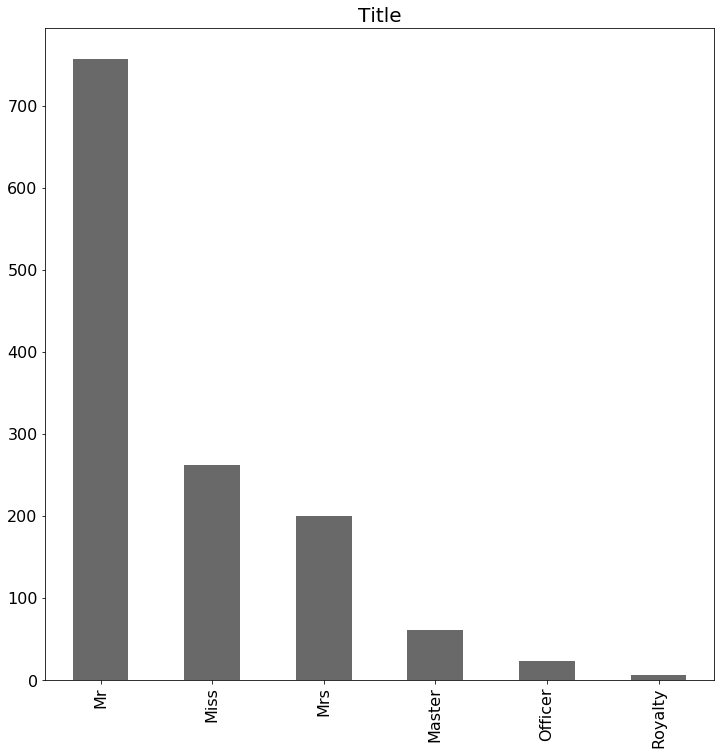

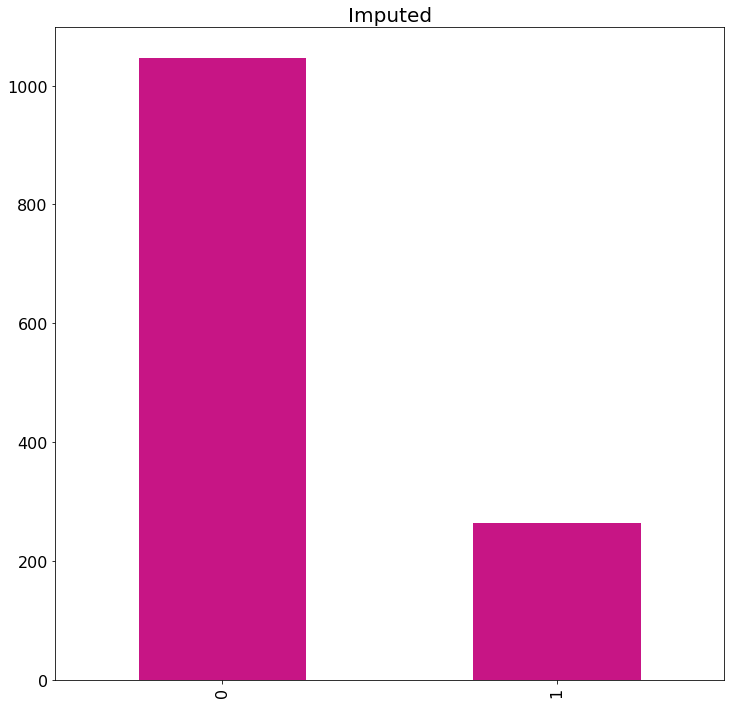

In [5]:
for i,column in enumerate(columns):
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    plt.figure(i)
    ax = df[column].value_counts().head(10).plot.bar(
        color=color,
        fontsize=16,
    )
    ax.set_title(column, fontsize=20)
    plt.show()